In [2]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

In [3]:
kmax = 100
dm = 0.1201075
neff=3.044
dneff=0.03

kk = np.logspace(np.log10(0.001),np.log10(kmax),1000)

lcdm = Class()
lcdm.set({
    'output':'mPk',
    'omega_cdm':dm,
    'N_ur':neff,
    'P_k_max_h/Mpc':kmax
          })
lcdm.compute()
h = lcdm.h()
pk_lcdm = np.vectorize(lcdm.pk_lin)(kk*h,0)

ref = Class()
ref.set({
    'output':'mPk',
    'omega_cdm':dm,
    'N_ur':neff+dneff,
    'P_k_max_h/Mpc':kmax
          })
ref.compute()
h = ref.h()
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

Compute for log10a= -2.0
dNeff= 0.030000000000000693
Compute for log10a= -1.75
dNeff= 0.030000000000000693
Compute for log10a= -1.5
dNeff= 0.030000000000000693
Compute for log10a= -1.25
dNeff= 0.030000000000000693
Compute for log10a= -1.0
dNeff= 0.030000000000000693


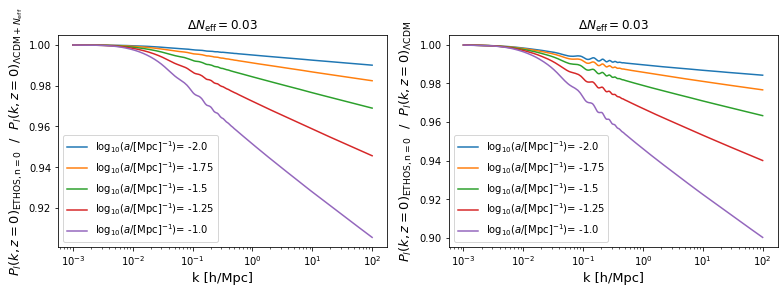

In [6]:
model = Class()
model.empty()
m=20
dm = 0.1201075
a_list = np.linspace(-2,-1.,5)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(11,4))

for a in a_list :
    model.set({
        'output':'mPk',
        'nindex_idm_dr':0,
        'N_ur':neff,
        'N_idr':dneff,
        'omega_cdm':0.,
        'omega_idm_dr':dm,
        'a_idm_dr':10**a,
        'P_k_max_h/Mpc':kmax,
        'perturbations_verbose':3
              })
    print ("Compute for log10a=",a)
    model.compute()
    h=model.h()
    print ('dNeff=',model.Neff()-neff)
    
    ax[0].plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_ref, label = r'$\log_{10}(a/[\mathrm{Mpc}]^{-1})$'+ '= {a}'.format(a=a) )
    ax[1].plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_lcdm, label = r'$\log_{10}(a/[\mathrm{Mpc}]^{-1})$'+ '= {a}'.format(a=a) )
    
    ax[0].set_xscale('log')
    ax[0].set_yscale('linear')
    ax[1].set_xscale('log')
    ax[1].set_yscale('linear')
    
    ax[0].set_ylabel(r'$P_l(k,z=0)_\mathrm{ETHOS} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}+N_\mathrm{eff}}$', fontsize=13)
    ax[0].set_xlabel(r'k [h/Mpc]', fontsize=13)
    #plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
    ax[0].set_title(r'$n=0, \, \Delta N_\mathrm{eff} =$'+r'{a}'.format(a=dneff))
    ax[0].legend()
    
    ax[1].set_ylabel(r'$P_l(k,z=0)_\mathrm{ETHOS} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
    ax[1].set_xlabel(r'k [h/Mpc]', fontsize=13)
    #plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
    ax[1].set_title(r'$n=0, \, \Delta N_\mathrm{eff} =$'+r'{a}'.format(a=dneff))
    ax[1].legend()
    
    plt.tight_layout()
    plt.savefig('ratio_of_pklin.png')

xi,comb,a 0.1 1.0 0.9999999999999999
compute for xi,log10a= 0.1 0.9999999999999999
dNeff= 0.00038528040796492746
xi,comb,a 0.1 10.0 9.999999999999998
compute for xi,log10a= 0.1 9.999999999999998
dNeff= 0.00038528040796492746
xi,comb,a 0.3 1.0 0.01234567901234568
compute for xi,log10a= 0.3 0.01234567901234568
dNeff= 0.031207713045174668
xi,comb,a 0.3 10.0 0.1234567901234568
compute for xi,log10a= 0.3 0.1234567901234568
dNeff= 0.031207713045174668


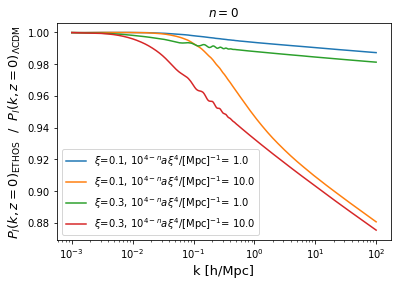

In [23]:
############ n=0 ##################

model = Class()
model.empty()
dm = 0.1201075
n_ethos=0

comb_list = np.linspace(1.,10.,2)
xi_list = np.linspace(0.1,0.3,2)

for xi in xi_list:
    for comb in comb_list:
        a = 10**(n_ethos-4.) * comb / xi**4
        print ('xi,comb,a',xi,comb,a)
        model.set({
            'output':'mPk',
            'nindex_idm_dr':n_ethos,
            'N_ur':neff,
            'xi_idr':xi,
            'omega_cdm':0.,
            'omega_idm_dr':dm,
            'a_idm_dr':a,
            'P_k_max_h/Mpc':kmax
                  })
        print ('compute for xi,log10a=',xi,a)
        model.compute()
        h=model.h()
        print ('dNeff=',model.Neff()-neff)
    
        plt.plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_lcdm, 
                 label = r'$\xi$='+'{a}'.format(a=xi)+r', $10^{4-n}a \xi^4/[\mathrm{Mpc}]^{-1}$'+ '= {a}'.format(a=comb) )
 
        plt.xscale('log')
        plt.yscale('linear')
    
        plt.ylabel(r'$P_l(k,z=0)_\mathrm{ETHOS} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
        plt.xlabel(r'k [h/Mpc]', fontsize=13)
        #plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
        plt.title(r'$n=$'+r'{a}'.format(a=n_ethos))
        plt.legend()
    
        plt.savefig('ratio_of_pklin.png')

xi,comb,a 0.1 1.0 99.99999999999999
compute for xi,log10a= 0.1 99.99999999999999
dNeff= 0.00038528040796492746
xi,comb,a 0.1 10.0 999.9999999999999
compute for xi,log10a= 0.1 999.9999999999999
dNeff= 0.00038528040796492746
xi,comb,a 0.3 1.0 1.234567901234568
compute for xi,log10a= 0.3 1.234567901234568
dNeff= 0.031207713045174668
xi,comb,a 0.3 10.0 12.34567901234568
compute for xi,log10a= 0.3 12.34567901234568
dNeff= 0.031207713045174668


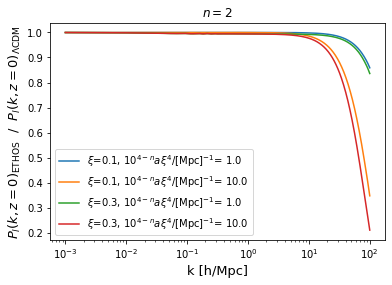

In [22]:
############ n=2 ##################

model = Class()
model.empty()
dm = 0.1201075
n_ethos=2

comb_list = np.linspace(1.,10.,2)
xi_list = np.linspace(0.1,0.3,2)

for xi in xi_list:
    for comb in comb_list:
        a = 10**(n_ethos-4.) * comb / xi**4
        print ('xi,comb,a',xi,comb,a)
        model.set({
            'output':'mPk',
            'nindex_idm_dr':n_ethos,
            'N_ur':neff,
            'xi_idr':xi,
            'omega_cdm':0.,
            'omega_idm_dr':dm,
            'a_idm_dr':a,
            'P_k_max_h/Mpc':kmax
                  })
        print ('compute for xi,log10a=',xi,a)
        model.compute()
        h=model.h()
        print ('dNeff=',model.Neff()-neff)
    
        plt.plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_lcdm, 
                 label = r'$\xi$='+'{a}'.format(a=xi)+r', $10^{4-n}a \xi^4/[\mathrm{Mpc}]^{-1}$'+ '= {a}'.format(a=comb) )
 
        plt.xscale('log')
        plt.yscale('linear')
    
        plt.ylabel(r'$P_l(k,z=0)_\mathrm{ETHOS} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
        plt.xlabel(r'k [h/Mpc]', fontsize=13)
        #plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
        plt.title(r'$n=$'+r'{a}'.format(a=n_ethos))
        plt.legend()
    
        plt.savefig('ratio_of_pklin.png')

xi,comb,a 0.1 1.0 9999.999999999998
compute for xi,log10a= 0.1 9999.999999999998
dNeff= 0.00038528040796492746
xi,comb,a 0.1 10.0 99999.99999999999
compute for xi,log10a= 0.1 99999.99999999999
dNeff= 0.00038528040796492746
xi,comb,a 0.3 1.0 123.4567901234568
compute for xi,log10a= 0.3 123.4567901234568
dNeff= 0.031207713045174668
xi,comb,a 0.3 10.0 1234.567901234568
compute for xi,log10a= 0.3 1234.567901234568
dNeff= 0.031207713045174668


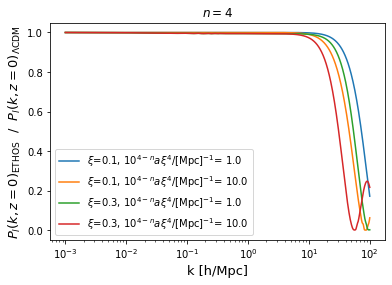

In [21]:
############ n=4 ##################

model = Class()
model.empty()
dm = 0.1201075
n_ethos=4

comb_list = np.linspace(1.,10.,2)
xi_list = np.linspace(0.1,0.3,2)

for xi in xi_list:
    for comb in comb_list:
        a = 10**(n_ethos-4) * comb / xi**4
        print ('xi,comb,a',xi,comb,a)
        model.set({
            'output':'mPk',
            'nindex_idm_dr':n_ethos,
            'N_ur':neff,
            'xi_idr':xi,
            'omega_cdm':0.,
            'omega_idm_dr':dm,
            'a_idm_dr':a,
            'P_k_max_h/Mpc':kmax
                  })
        print ('compute for xi,log10a=',xi,a)
        model.compute()
        h=model.h()
        print ('dNeff=',model.Neff()-neff)
    
        plt.plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_lcdm, 
                 label = r'$\xi$='+'{a}'.format(a=xi)+r', $10^{4-n}a \xi^4/[\mathrm{Mpc}]^{-1}$'+ '= {a}'.format(a=comb) )
 
        plt.xscale('log')
        plt.yscale('linear')
    
        plt.ylabel(r'$P_l(k,z=0)_\mathrm{ETHOS} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
        plt.xlabel(r'k [h/Mpc]', fontsize=13)
        #plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
        plt.title(r'$n=$'+r'{a}'.format(a=n_ethos))
        plt.legend()
    
        plt.savefig('ratio_of_pklin.png')